In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
#loading dataset to pandas dataframe
loan_dataset = pd.read_csv('dataset.csv');

In [8]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [10]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [14]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
#number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [20]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
#label encoding (converting the categorical values like Y and N to numerical for better and easy processing)
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\VIDHI TRIVEDI\AppData\Local\Temp\ipykernel_22356\3666460984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [24]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [26]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [28]:
#replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value = 4)

In [30]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

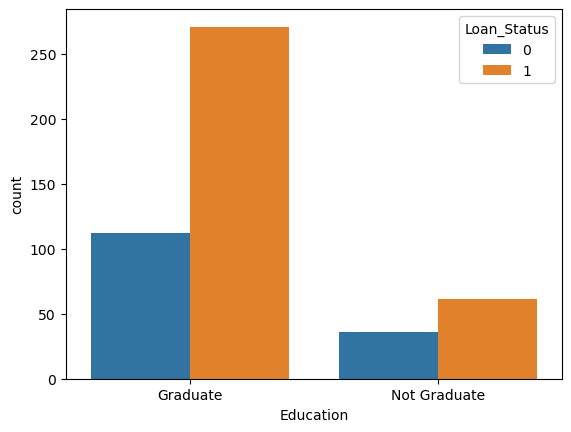

In [34]:
#plotting the education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

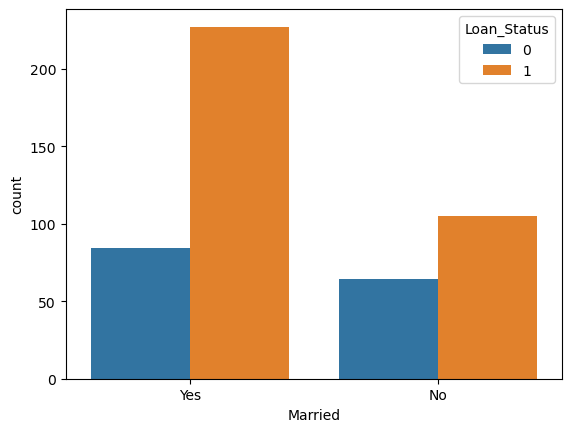

In [36]:
#marital status and loan status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

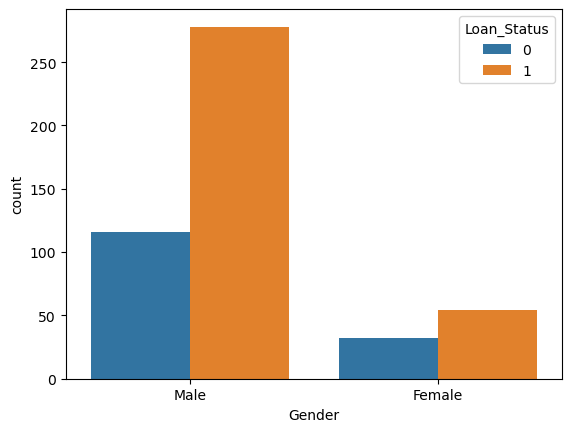

In [38]:
#gender and loan status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

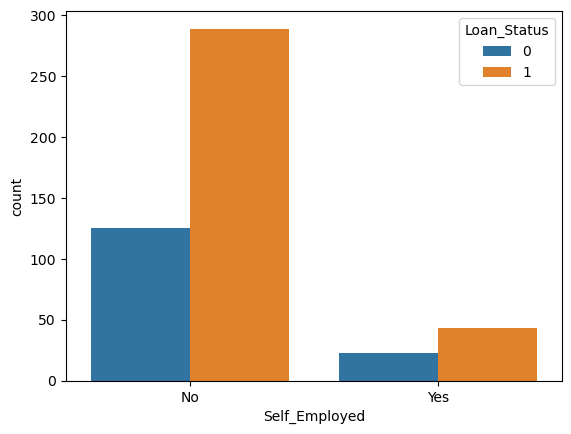

In [40]:
#Self_Employed and loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='ApplicantIncome', ylabel='count'>

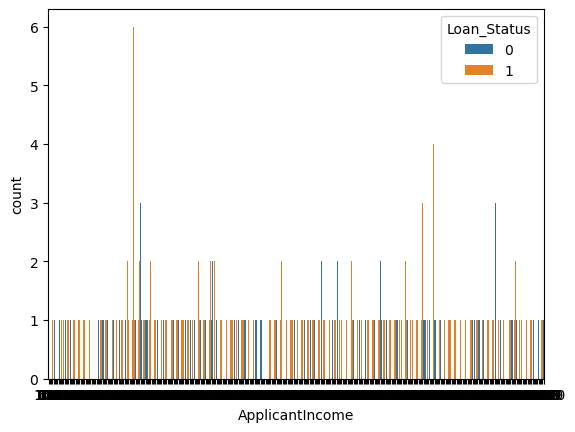

In [42]:
#ApplicantIncome and loan status
sns.countplot(x='ApplicantIncome', hue='Loan_Status', data=loan_dataset)

In [44]:
#converting the text data(categorical columns) to numerical values
loan_dataset.replace({"Married":{'No':0,'Yes':1},"Gender":{'Female':0,'Male':1},"Self_Employed":{'No':0,'Yes':1}, "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}, "Education":{'Not Graduate':0,'Graduate':1}},inplace=True)

C:\Users\VIDHI TRIVEDI\AppData\Local\Temp\ipykernel_22356\328155467.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Married":{'No':0,'Yes':1},"Gender":{'Female':0,'Male':1},"Self_Employed":{'No':0,'Yes':1}, "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}, "Education":{'Not Graduate':0,'Graduate':1}},inplace=True)


In [46]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [50]:
#separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [52]:
#splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, stratify=Y,random_state=2)

In [54]:
X.shape

(480, 11)

In [56]:
x_train.shape

(432, 11)

In [58]:
x_test.shape

(48, 11)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [88]:
#training the data using the Support Vector Machine model
classifier = svm.SVC(kernel='linear')

In [90]:
#training  the svm model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [92]:
#model evaluation
#acuracy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [94]:
print('Accuracy Score:',training_data_accuracy)

Accuracy Score: 0.8055555555555556


In [96]:
#acuracy score on testing data
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [98]:
print('Accuracy Score:',testing_data_accuracy)

Accuracy Score: 0.8333333333333334


In [100]:
#Predictive System
input_data = (1,1,1,1,0,4583,1508,128,360,1,0)

# changing input_data to numpy array
input_data_numpyArray = np.asarray(input_data)

# reshape the array
input_data_reshape = input_data_numpyArray.reshape(1, -1)

# scale the input data
input_data_scaled = scaler.transform(input_data_reshape)

# make prediction
prediction = classifier.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print("Loan is rejected")
else:
    print("Loan is approved")


[1]
Loan is approved


C:\Users\VIDHI TRIVEDI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
